# Cohort Analysis for Store Retention

## 1. Load the Data

Before we dive into the analysis, let's start by loading our data. We're using Pandas here, which is perfect for handling and analyzing large datasets. We'll load our store and order data from CSV files.

In [1]:
import pandas as pd

# Load store and order data
stores_df = pd.read_csv('../datasets/generated/stores.csv')
orders_df = pd.read_csv('../datasets/generated/orders.csv')

In [2]:
stores_df

,slug,created_at,country_id
0,"Lewis, Johnston and Mueller",2019-10-20 15:05:13,12
1,Gray-Rodriguez,2019-07-06 23:34:48,10
2,Nelson-Rogers,2018-05-21 04:27:40,20
3,"Rice, Long and Kim",2019-05-02 10:40:32,5
4,Mcgee-Holmes,2019-02-14 20:23:34,11
...,...,...,...
495,"Barry, Greene and Hernandez",2018-01-25 23:17:57,6
496,Morris-Thomas,2017-12-30 06:34:43,13
497,"Wood, Ray and Harris",2018-06-29 08:33:08,7
498,Holmes-Walker,2017-06-10 20:04:41,18


In [3]:
orders_df

,type,store_id,created_at
0,Pickup,1,2019-12-25 04:41:21
1,Pickup,1,2019-10-28 11:00:26
2,In-Store,1,2019-12-05 09:16:21
3,In-Store,1,2019-12-06 22:57:37
4,Pickup,1,2019-10-21 17:50:48
...,...,...,...
492501,Online,500,2017-09-26 16:54:41
492502,Online,500,2019-12-31 05:19:42
492503,Online,500,2017-07-22 03:06:22
492504,In-Store,500,2019-04-23 16:20:52


## 2. Preprocess the Data
Data isn't always in the format we need. So, let's clean it up!.

In [4]:
stores_df['created_at']

0      2019-10-20 15:05:13
1      2019-07-06 23:34:48
2      2018-05-21 04:27:40
3      2019-05-02 10:40:32
4      2019-02-14 20:23:34
              ...         
495    2018-01-25 23:17:57
496    2017-12-30 06:34:43
497    2018-06-29 08:33:08
498    2017-06-10 20:04:41
499    2017-03-15 09:30:23
Name: created_at, Length: 500, dtype: object

In [5]:
orders_df['created_at']

0         2019-12-25 04:41:21
1         2019-10-28 11:00:26
2         2019-12-05 09:16:21
3         2019-12-06 22:57:37
4         2019-10-21 17:50:48
                 ...         
492501    2017-09-26 16:54:41
492502    2019-12-31 05:19:42
492503    2017-07-22 03:06:22
492504    2019-04-23 16:20:52
492505    2017-04-25 10:00:25
Name: created_at, Length: 492506, dtype: object

 We'll convert dates to a proper format and handle any missing values to ensure our dataset is analysis-ready

In [6]:
# Convert date columns to datetime objects
stores_df['created_at'] = pd.to_datetime(stores_df['created_at'])
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'])

# Fill any missing data
stores_df.fillna(method='ffill', inplace=True)


C:\Users\taha\AppData\Local\Temp\ipykernel_22232\2777580981.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stores_df.fillna(method='ffill', inplace=True)


Let's check our data again

In [7]:
stores_df['created_at']

0     2019-10-20 15:05:13
1     2019-07-06 23:34:48
2     2018-05-21 04:27:40
3     2019-05-02 10:40:32
4     2019-02-14 20:23:34
              ...        
495   2018-01-25 23:17:57
496   2017-12-30 06:34:43
497   2018-06-29 08:33:08
498   2017-06-10 20:04:41
499   2017-03-15 09:30:23
Name: created_at, Length: 500, dtype: datetime64[ns]

In [8]:
orders_df['created_at']

0        2019-12-25 04:41:21
1        2019-10-28 11:00:26
2        2019-12-05 09:16:21
3        2019-12-06 22:57:37
4        2019-10-21 17:50:48
                 ...        
492501   2017-09-26 16:54:41
492502   2019-12-31 05:19:42
492503   2017-07-22 03:06:22
492504   2019-04-23 16:20:52
492505   2017-04-25 10:00:25
Name: created_at, Length: 492506, dtype: datetime64[ns]

## 3. Define Cohorts and Calculate Cohort Sizes
Now, let's define our cohorts. A cohort is a group of stores that started at the same time. We'll categorize stores based on their creation month for our analysis.

In [9]:
# Creating a cohort based on the month stores were added
stores_df['Cohort'] = stores_df['created_at'].dt.to_period('M')


In [10]:
stores_df['Cohort'] 

0      2019-10
1      2019-07
2      2018-05
3      2019-05
4      2019-02
        ...   
495    2018-01
496    2017-12
497    2018-06
498    2017-06
499    2017-03
Name: Cohort, Length: 500, dtype: period[M]

## 4. Merge with Transactional Data
Next up, we merge our store data with their corresponding orders. This helps us track how active each store is over time, which is crucial for our retention analysis.

In [11]:
# Merge store data with order data
merged_df = pd.merge(orders_df, stores_df, left_on='store_id', right_index=True)


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491534 entries, 0 to 491533
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          491534 non-null  object        
 1   store_id      491534 non-null  int64         
 2   created_at_x  491534 non-null  datetime64[ns]
 3   slug          491534 non-null  object        
 4   created_at_y  491534 non-null  datetime64[ns]
 5   country_id    491534 non-null  int64         
 6   Cohort        491534 non-null  period[M]     
dtypes: datetime64[ns](2), int64(2), object(2), period[M](1)
memory usage: 30.0+ MB


In [13]:
# Rename 'created_at_x' to 'order_date' and 'created_at_y' to 'store_created_at'
merged_df = merged_df.rename(columns={'created_at_x': 'order_date', 'created_at_y': 'store_created_at'})


In [14]:
merged_df

,type,store_id,order_date,slug,store_created_at,country_id,Cohort
0,Pickup,1,2019-12-25 04:41:21,Gray-Rodriguez,2019-07-06 23:34:48,10,2019-07
1,Pickup,1,2019-10-28 11:00:26,Gray-Rodriguez,2019-07-06 23:34:48,10,2019-07
2,In-Store,1,2019-12-05 09:16:21,Gray-Rodriguez,2019-07-06 23:34:48,10,2019-07
3,In-Store,1,2019-12-06 22:57:37,Gray-Rodriguez,2019-07-06 23:34:48,10,2019-07
4,Pickup,1,2019-10-21 17:50:48,Gray-Rodriguez,2019-07-06 23:34:48,10,2019-07
...,...,...,...,...,...,...,...
491529,In-Store,499,2019-12-20 04:33:01,Clark Group,2017-03-15 09:30:23,7,2017-03
491530,Pickup,499,2019-03-10 18:48:07,Clark Group,2017-03-15 09:30:23,7,2017-03
491531,Pickup,499,2018-01-16 14:06:44,Clark Group,2017-03-15 09:30:23,7,2017-03
491532,In-Store,499,2018-07-05 18:11:57,Clark Group,2017-03-15 09:30:23,7,2017-03


## 5. Calculate Retention
It's crunch time! Let's calculate the retention rate. We want to see how many stores from each cohort continue to be active in the following months.

In [15]:
from operator import attrgetter

# Assign acquisition month cohort
merged_df['OrderMonth'] = merged_df['order_date'].dt.to_period('M')
merged_df['CohortIndex'] = (merged_df['OrderMonth'] - merged_df['Cohort']).apply(attrgetter('n'))

# Create a retention table
cohort_data = merged_df.groupby(['Cohort', 'CohortIndex'])['store_id'].nunique().reset_index()
cohort_count = cohort_data.pivot_table(index='Cohort', columns='CohortIndex', values='store_id')

# Calculate retention as a percentage
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis=0)


## 6. Visualize the Results
Finally, let's make our results easy to understand with a visualization. A heatmap works great here, showing us at a glance how well each cohort retains stores over time.

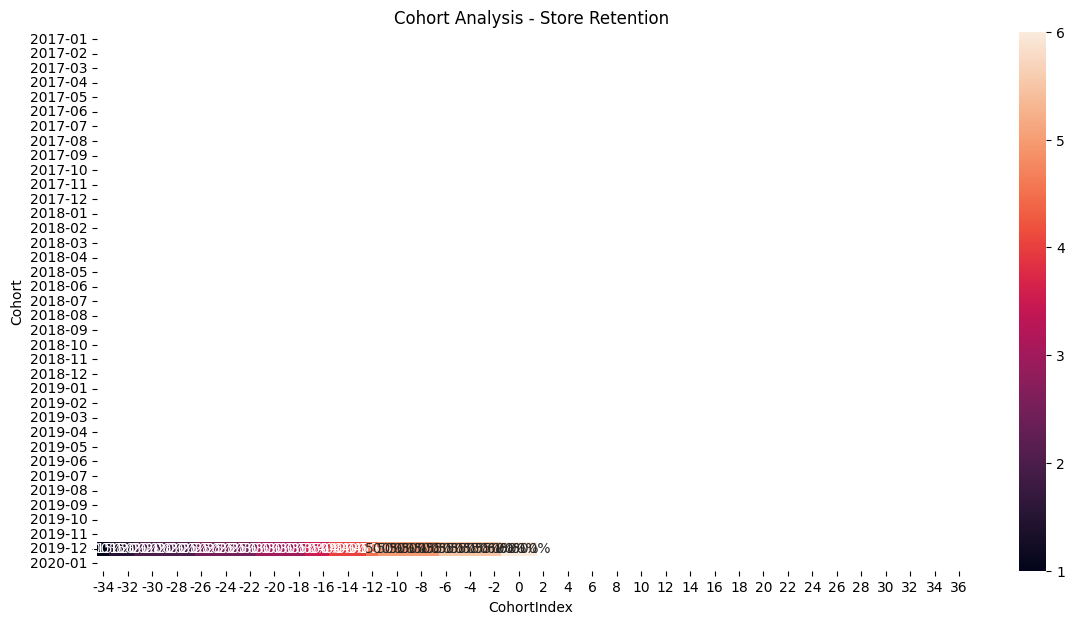

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.heatmap(data=retention, annot=True, fmt='.0%')
plt.title('Cohort Analysis - Store Retention')
plt.show()


And here we have a cohort analysis that provides us valuable insights into how well our stores are being retained over time.